# keras 函数api

In [1]:
# !pip install pydot
#!sudo apt-get install graphvizf

In [2]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
tf.keras.backend.clear_session()

## 1构建简单的网络
### 1.1创建网络

Model: "mnist model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


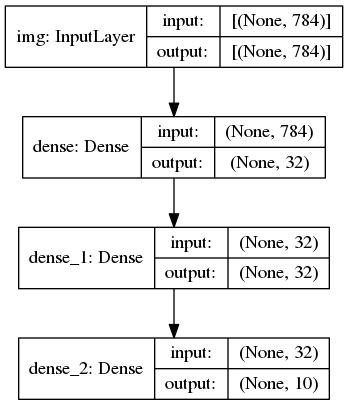

In [3]:

inputs = tf.keras.Input(shape=(784,), name='img')
h1 = layers.Dense(32, activation='relu')(inputs)
h2 = layers.Dense(32, activation='relu')(h1)
outputs = layers.Dense(10, activation='softmax')(h2)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist model')

model.summary()
keras.utils.plot_model(model, 'mnist_model.png')
keras.utils.plot_model(model, 'model_info.png', show_shapes=True)

### 1.2训练、验证及测试

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255
model.compile(optimizer=keras.optimizers.RMSprop(),
             loss='sparse_categorical_crossentropy', # 直接填api，后面会报错
             metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', test_scores[0])
print('test acc:', test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1s 25us/sample - loss: 0.4348 - accuracy: 0.8789 - val_loss: 0.2452 - val_accuracy: 0.9301
Epoch 2/5
48000/48000 [==============================] - 1s 20us/sample - loss: 0.2164 - accuracy: 0.9371 - val_loss: 0.1792 - val_accuracy: 0.9487
Epoch 3/5
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1706 - accuracy: 0.9501 - val_loss: 0.1632 - val_accuracy: 0.9532
Epoch 4/5
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1438 - accuracy: 0.9572 - val_loss: 0.1585 - val_accuracy: 0.9553
Epoch 5/5
48000/48000 [==============================] - 1s 20us/sample - loss: 0.1261 - accuracy: 0.9627 - val_loss: 0.1381 - val_accuracy: 0.9603
test loss: 0.14040755774863065
test acc: 0.9605


### 1.3模型保持和序列化

In [5]:
model.save('model_save.h5')
del model
model = keras.models.load_model('model_save.h5')

## 2 使用共享网络创建多个模型
在函数API中，通过在图层图中指定其输入和输出来创建模型。 这意味着可以使用单个图层图来生成多个模型。

In [9]:
# 编码器网络和自编码器网络

encode_input = keras.Input(shape=(28,28,1), name='img')
h1 = layers.Conv2D(16, 3, activation='relu')(encode_input)
h1 = layers.Conv2D(32, 3, activation='relu')(h1)
h1 = layers.MaxPool2D(3)(h1)
h1 = layers.Conv2D(32, 3, activation='relu')(h1)
h1 = layers.Conv2D(16, 3, activation='relu')(h1)
encode_output = layers.GlobalMaxPool2D()(h1)

encode_model = keras.Model(inputs=encode_input, outputs=encode_output, name='encoder')
encode_model.summary()

h2 = layers.Reshape((4, 4, 1))(encode_output)
h2 = layers.Conv2DTranspose(16, 3, activation='relu')(h2)
h2 = layers.Conv2DTranspose(32, 3, activation='relu')(h2)
h2 = layers.UpSampling2D(3)(h2)
h2 = layers.Conv2DTranspose(16, 3, activation='relu')(h2)
decode_output = layers.Conv2DTranspose(1, 3, activation='relu')(h2)

autoencoder = keras.Model(inputs=encode_input, outputs=decode_output, name='autoencoder')
autoencoder.summary()





Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

可以把整个模型，当作一层网络使用

In [11]:
encode_input = keras.Input(shape=(28,28,1), name='src_img')
h1 = layers.Conv2D(16, 3, activation='relu')(encode_input)
h1 = layers.Conv2D(32, 3, activation='relu')(h1)
h1 = layers.MaxPool2D(3)(h1)
h1 = layers.Conv2D(32, 3, activation='relu')(h1)
h1 = layers.Conv2D(16, 3, activation='relu')(h1)
encode_output = layers.GlobalMaxPool2D()(h1)

encode_model = keras.Model(inputs=encode_input, outputs=encode_output, name='encoder')
encode_model.summary()

decode_input = keras.Input(shape=(16,), name='encoded_img')
h2 = layers.Reshape((4, 4, 1))(decode_input)
h2 = layers.Conv2DTranspose(16, 3, activation='relu')(h2)
h2 = layers.Conv2DTranspose(32, 3, activation='relu')(h2)
h2 = layers.UpSampling2D(3)(h2)
h2 = layers.Conv2DTranspose(16, 3, activation='relu')(h2)
decode_output = layers.Conv2DTranspose(1, 3, activation='relu')(h2)
decode_model = keras.Model(inputs=decode_input, outputs=decode_output, name='decoder')
decode_model.summary()

autoencoder_input = keras.Input(shape=(28,28,1), name='img')
h3 = encode_model(autoencoder_input)
autoencoder_output = decode_model(h3)
autoencoder = keras.Model(inputs=autoencoder_input, outputs=autoencoder_output,
                          name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
src_img (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_3 (Glob (None, 16)                0   

## 3.复杂网络结构构建
### 3.1多输入与多输出网络

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
body (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, None, 64)     128000      title[0][0]                      
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, None, 64)     128000      body[0][0]                       
____________________________________________________________________________________________

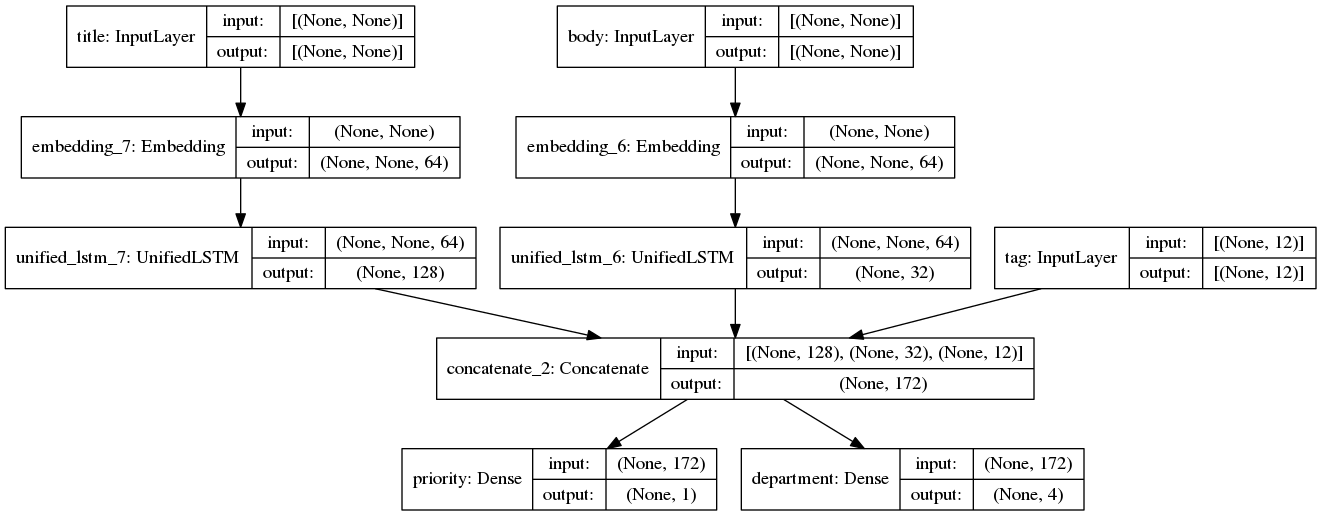

In [18]:
# 构建一个根据文档内容、标签和标题，预测文档优先级和执行部门的网络
# 超参
num_words = 2000
num_tags = 12
num_departments = 4

# 输入
body_input = keras.Input(shape=(None,), name='body')
title_input = keras.Input(shape=(None,), name='title')
tag_input = keras.Input(shape=(num_tags,), name='tag')

# 嵌入层
body_feat = layers.Embedding(num_words, 64)(body_input)
title_feat = layers.Embedding(num_words, 64)(title_input)

# 特征提取层
body_feat = layers.LSTM(32)(body_feat)
title_feat = layers.LSTM(128)(title_feat)
features = layers.concatenate([title_feat,body_feat, tag_input])

# 分类层
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(features)
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(features)


# 构建模型
model = keras.Model(inputs=[body_input, title_input, tag_input],
                    outputs=[priority_pred, department_pred])
model.summary()
keras.utils.plot_model(model, 'multi_model.png', show_shapes=True)

In [20]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss={'priority': 'binary_crossentropy',
                  'department': 'categorical_crossentropy'},
             loss_weights=[1., 0.2])

import numpy as np
# 载入输入数据
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tag_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')
# 标签
priority_label = np.random.random(size=(1280, 1))
department_label = np.random.randint(2, size=(1280, num_departments))
# 训练
history = model.fit(
    {'title': title_data, 'body':body_data, 'tag':tag_data},
    {'priority':priority_label, 'department':department_label},
    batch_size=32,
    epochs=5
)

Epoch 1/5
1280/1280 [==============================] - 7s 6ms/sample - loss: 1.2544 - priority_loss: 0.6996 - department_loss: 2.7743
Epoch 2/5
1280/1280 [==============================] - 7s 5ms/sample - loss: 1.2175 - priority_loss: 0.6682 - department_loss: 2.7468
Epoch 3/5
1280/1280 [==============================] - 7s 6ms/sample - loss: 1.1374 - priority_loss: 0.5954 - department_loss: 2.7098
Epoch 4/5
1280/1280 [==============================] - 7s 6ms/sample - loss: 1.0794 - priority_loss: 0.5482 - department_loss: 2.6561
Epoch 5/5
1280/1280 [==============================] - 7s 5ms/sample - loss: 1.0388 - priority_loss: 0.5233 - department_loss: 2.5774


### 3.2小型残差网络

Model: "small resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_28[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_29[0][0]                  
_______________________________________________________________________________________

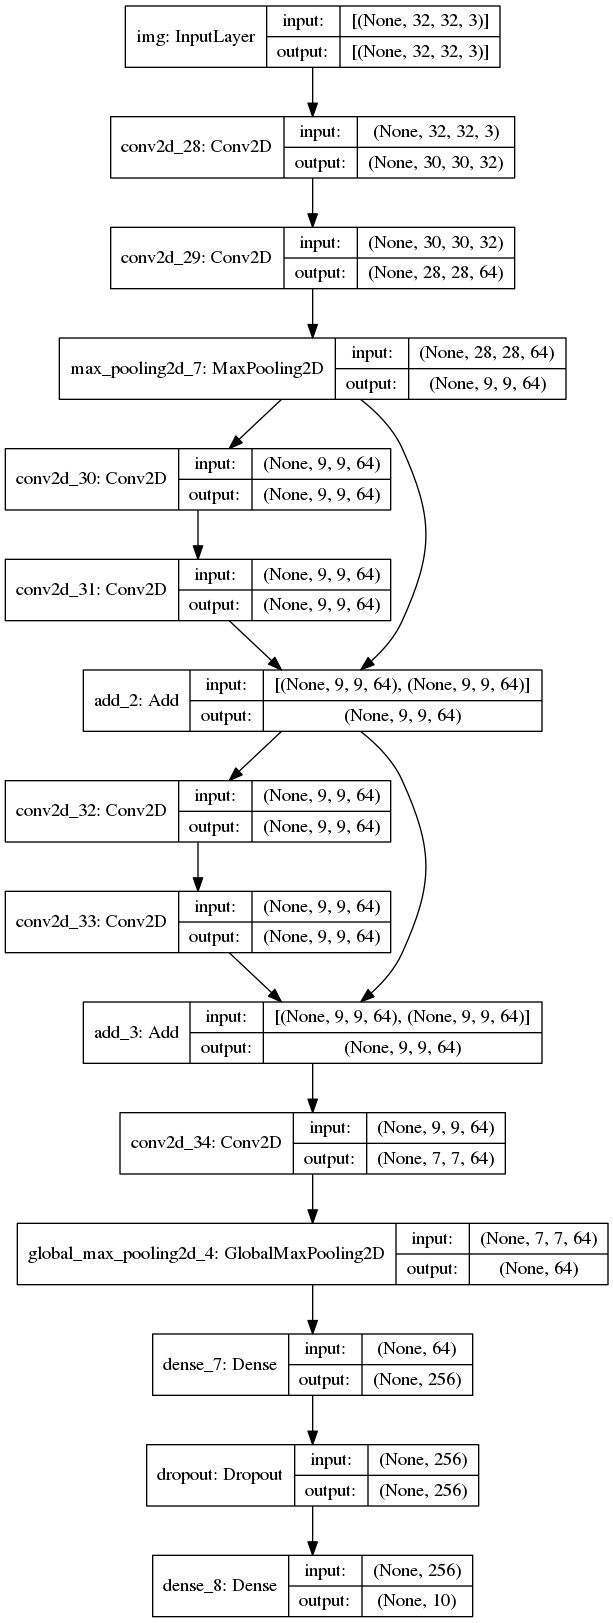

In [23]:
inputs = keras.Input(shape=(32,32,3), name='img')
h1 = layers.Conv2D(32, 3, activation='relu')(inputs)
h1 = layers.Conv2D(64, 3, activation='relu')(h1)
block1_out = layers.MaxPooling2D(3)(h1)

h2 = layers.Conv2D(64, 3, activation='relu', padding='same')(block1_out)
h2 = layers.Conv2D(64, 3, activation='relu', padding='same')(h2)
block2_out = layers.add([h2, block1_out])

h3 = layers.Conv2D(64, 3, activation='relu', padding='same')(block2_out)
h3 = layers.Conv2D(64, 3, activation='relu', padding='same')(h3)
block3_out = layers.add([h3, block2_out])

h4 = layers.Conv2D(64, 3, activation='relu')(block3_out)
h4 = layers.GlobalMaxPool2D()(h4)
h4 = layers.Dense(256, activation='relu')(h4)
h4 = layers.Dropout(0.5)(h4)
outputs = layers.Dense(10, activation='softmax')(h4)

model = keras.Model(inputs, outputs, name='small resnet')
model.summary()
keras.utils.plot_model(model, 'small_resnet_model.png', show_shapes=True)


In [26]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = y_train.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss='categorical_crossentropy',
             metrics=['acc'])
model.fit(x_train, y_train,
         batch_size=64,
         epochs=1,
         validation_split=0.2)

#model.predict(x_test, batch_size=32)

Train on 40000 samples, validate on 10000 samples
40000/40000 [==============================] - 85s 2ms/sample - loss: 1.4249 - acc: 0.4866 - val_loss: 1.2088 - val_acc: 0.5632


## 4.共享网络层

In [27]:
share_embedding = layers.Embedding(1000, 64)

input1 = keras.Input(shape=(None,), dtype='int32')
input2 = keras.Input(shape=(None,), dtype='int32')

feat1 = share_embedding(input1)
feat2 = share_embedding(input2)

## 5.模型复用

In [ ]:
from tensorflow.keras.applications import VGG16
vgg16=VGG16()

feature_list = [layer.output for layer in vgg16.layers]
feat_ext_model = keras.Model(inputs=vgg16.input, outputs=feature_list)

img = np.random.random((1, 224, 224, 3).astype('float32'))
ext_features = feat_ext_model(img)

## 6.自定义网络层

In [34]:
# import tensorflow as tf
# import tensorflow.keras as keras
class MyDense(layers.Layer):
    def __init__(self, units=32):
        super(MyDense, self).__init__()
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='random_normal',
                                 trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
    
    def get_config(self):
        return {'units': self.units}
    
inputs = keras.Input((4,))
outputs = MyDense(10)(inputs)
model = keras.Model(inputs, outputs)
config = model.get_config()
new_model = keras.Model.from_config(
config, custom_objects={'MyDense':MyDense}
)


In [48]:
# 在自定义网络层调用其他网络层

# 超参
time_step = 10
batch_size = 32
hidden_dim = 32
inputs_dim = 5

# 网络
class MyRnn(layers.Layer):
    def __init__(self):
        super(MyRnn, self).__init__()
        self.hidden_dim = hidden_dim
        self.projection1 = layers.Dense(units=hidden_dim, activation='relu')
        self.projection2 = layers.Dense(units=hidden_dim, activation='relu')
        self.classifier = layers.Dense(1, activation='sigmoid')
    def call(self, inputs):
        outs = []
        states = tf.zeros(shape=[inputs.shape[0], self.hidden_dim])
        for t in range(inputs.shape[1]):
            x = inputs[:,t,:]
            h = self.projection1(x)
            y = h + self.projection2(states)
            states = y
            outs.append(y)
        # print(outs)
        features = tf.stack(outs, axis=1)
        print(features.shape)
        return self.classifier(features)

# 构建网络
inputs = keras.Input(batch_shape=(batch_size, time_step, inputs_dim))
x = layers.Conv1D(32, 3)(inputs)
print(x.shape)
outputs = MyRnn()(x)
model = keras.Model(inputs, outputs)


rnn_model = MyRnn()
_ = rnn_model(tf.zeros((1, 10, 5)))





(32, 8, 32)
(32, 8, 32)
(1, 10, 32)


Model: "small resnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1327360   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

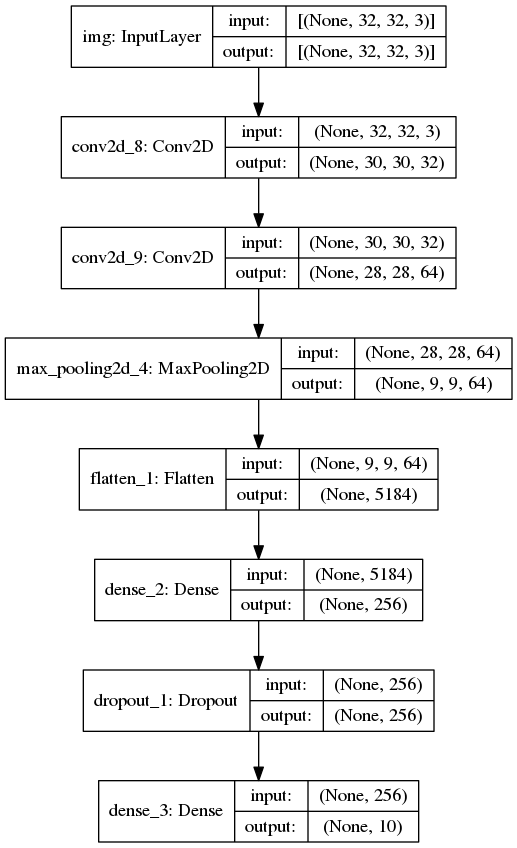

In [5]:
# 简单的卷积神经网络

from __future__ import absolute_import, division, print_function
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
inputs = keras.Input(shape=(32,32,3), name='img')
h1 = layers.Conv2D(32, 3, activation='relu')(inputs)
h2 = layers.Conv2D(64, 3, activation='relu')(h1)
h3 = layers.MaxPooling2D(3)(h2)
h3 = layers.Flatten()(h3)
h4 = layers.Dense(256, activation='relu')(h3)
h4 = layers.Dropout(0.5)(h4)
outputs = layers.Dense(10, activation='softmax')(h4)

model = keras.Model(inputs, outputs, name='small resnet')
model.summary()
keras.utils.plot_model(model, 'small_resnet_model.png', show_shapes=True)



In [ ]:
keras.layers.GlobalMaxPool1D
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = y_train.astype('float32') / 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss='categorical_crossentropy',
             metrics=['acc'])
model.fit(x_train, y_train,
         batch_size=64,
         epochs=1,
         validation_split=0.2)

#model.predict(x_test, batch_size=32)
